In [4]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/UAS BENGKOD/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


D.1.1 – Deskripsi dataset

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape (baris, kolom):", df.shape)
print("\nNama Kolom:\n", df.columns.tolist())

print("\nInfo tipe data:")
df.info()

print("\nStatistik deskriptif numerik:")
df.describe()


Shape (baris, kolom): (7043, 21)

Nama Kolom:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Info tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-nul

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


D.1.2 – Missing value

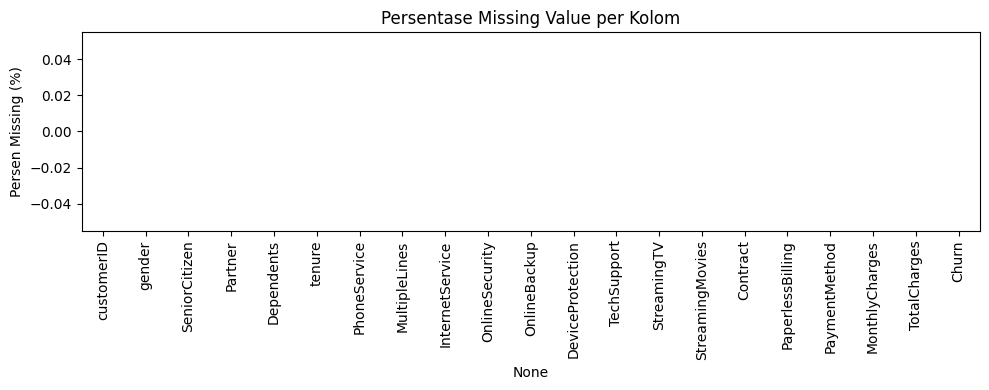

In [9]:
missing_count = df.isna().sum()
missing_pct = df.isna().mean() * 100

missing_df = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
}).sort_values("missing_pct", ascending=False)

missing_df
plt.figure(figsize=(10,4))
sns.barplot(x=missing_df.index, y="missing_pct", data=missing_df)
plt.xticks(rotation=90)
plt.ylabel("Persen Missing (%)")
plt.title("Persentase Missing Value per Kolom")
plt.tight_layout()
plt.show()


D.1.3 – Distribusi target

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Persentase:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


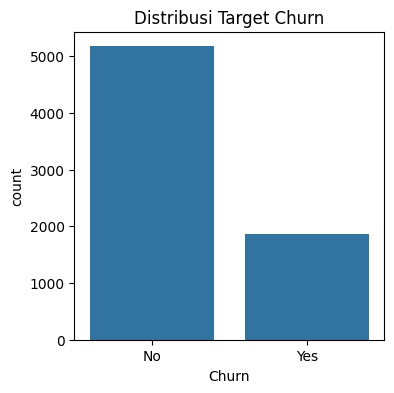

In [10]:
print(df['Churn'].value_counts())
print("\nPersentase:")
print(df['Churn'].value_counts(normalize=True) * 100)
plt.figure(figsize=(4,4))
sns.countplot(x="Churn", data=df)
plt.title("Distribusi Target Churn")
plt.show()


D.1.4 – Korelasi fitur numerik

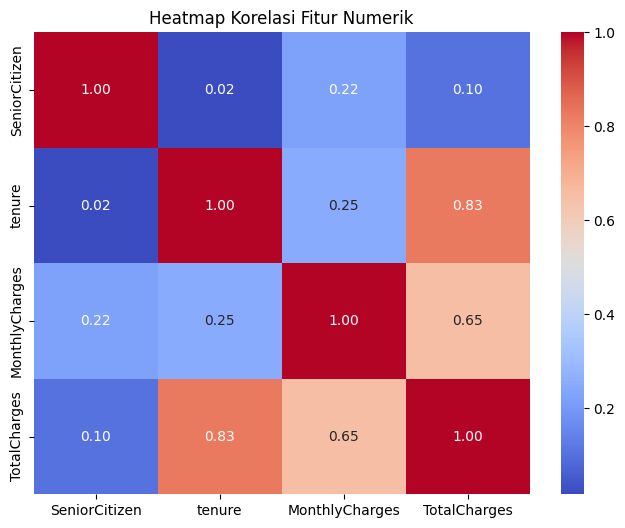

In [11]:
# pastikan TotalCharges numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()


D.2 – Modeling 1: Direct Modeling

In [18]:
from sklearn.model_selection import train_test_split

# salin lagi, khusus untuk direct modeling
df_direct = df.copy()

# ubah tipe data
df_direct['TotalCharges'] = pd.to_numeric(df_direct['TotalCharges'], errors='coerce')
df_direct['Churn'] = df_direct['Churn'].map({'Yes': 1, 'No': 0})

# drop ID
df_direct = df_direct.drop(columns=['customerID'])

#  buang semua baris yang masih ada NaN (untuk direct modeling saja)
df_direct = df_direct.dropna()

X_direct = df_direct.drop('Churn', axis=1)
y_direct = df_direct['Churn']

# one-hot encoding sederhana
X_direct_encoded = pd.get_dummies(X_direct, drop_first=True)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_direct_encoded, y_direct, test_size=0.2, random_state=42, stratify=y_direct
)

X_train_d.shape, X_test_d.shape




((5625, 30), (1407, 30))

D.2.2 – Definisikan 3 model (konvensional, bagging, voting)

=== LogReg + Preprocessing ===
Accuracy : 0.8055358410220014
Precision: 0.6572327044025157
Recall   : 0.5588235294117647
F1-score : 0.6040462427745664

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



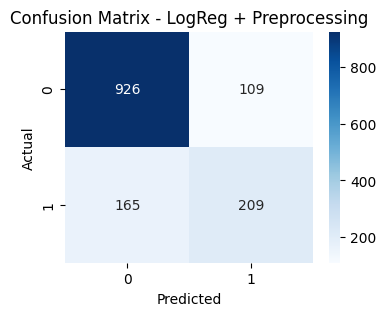

=== RandomForest + Preprocessing ===
Accuracy : 0.7778566359119943
Precision: 0.6033898305084746
Recall   : 0.47593582887700536
F1-score : 0.5321375186846039

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.60      0.48      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



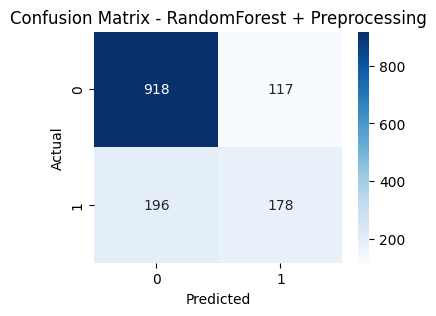

=== Voting + Preprocessing ===
Accuracy : 0.7963094393186657
Precision: 0.6389776357827476
Recall   : 0.5347593582887701
F1-score : 0.5822416302765647

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



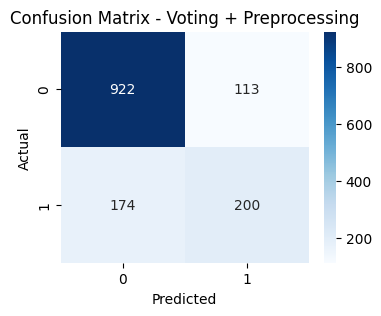

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df_prep = df.copy()
df_prep['TotalCharges'] = pd.to_numeric(df_prep['TotalCharges'], errors='coerce')
df_prep['Churn'] = df_prep['Churn'].map({'Yes': 1, 'No': 0})
df_prep = df_prep.drop(columns=['customerID'])

X = df_prep.drop('Churn', axis=1)
y = df_prep['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)
# 1. Logistic Regression + Preprocessing
log_reg_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# 2. Random Forest + Preprocessing (bagging)
rf_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# 3. Voting Classifier + Preprocessing
voting_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('knn', KNeighborsClassifier()),
            ('svm', SVC(probability=True))
        ],
        voting='soft'
    ))
])

models_prep = {
    "LogReg + Preprocessing": log_reg_pipe,
    "RandomForest + Preprocessing": rf_pipe,
    "Voting + Preprocessing": voting_pipe
}

for name, model in models_prep.items():
    eval_model(name, model, X_train, y_train, X_test, y_test)



D.3 – Hyperparameter Tuning (GridSearch)

D.3 – Tuning Logistic Regression

Best params LogReg: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best CV score LogReg: 0.5995303552724559
=== LogReg Tuned ===
Accuracy : 0.8055358410220014
Precision: 0.6572327044025157
Recall   : 0.5588235294117647
F1-score : 0.6040462427745664

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



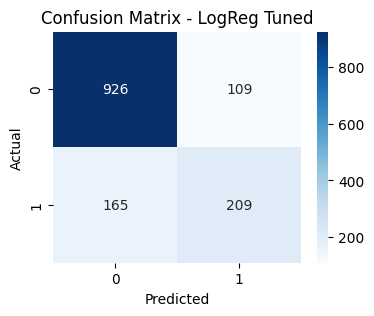

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid_log = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs']
}

grid_log = GridSearchCV(
    log_reg_pipe,
    param_grid_log,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_log.fit(X_train, y_train)

print("Best params LogReg:", grid_log.best_params_)
print("Best CV score LogReg:", grid_log.best_score_)

best_log = grid_log.best_estimator_
eval_model("LogReg Tuned", best_log, X_train, y_train, X_test, y_test)


Best params RF: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 300}
Best CV score RF: 0.5828024381064927
=== RandomForest Tuned ===
Accuracy : 0.801277501774308
Precision: 0.660958904109589
Recall   : 0.516042780748663
F1-score : 0.5795795795795796

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



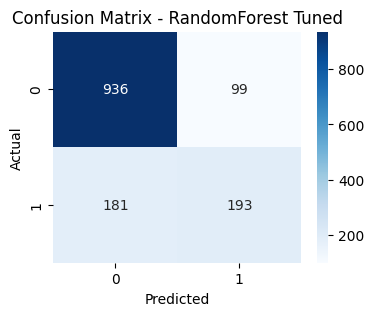

In [22]:
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    rf_pipe,
    param_grid_rf,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best params RF:", grid_rf.best_params_)
print("Best CV score RF:", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_
eval_model("RandomForest Tuned", best_rf, X_train, y_train, X_test, y_test)


Best params Voting: {'model__voting': 'hard'}
Best CV score Voting: 0.5850548960159753
=== Voting Tuned ===
Accuracy : 0.794889992902768
Precision: 0.639344262295082
Recall   : 0.5213903743315508
F1-score : 0.5743740795287187

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



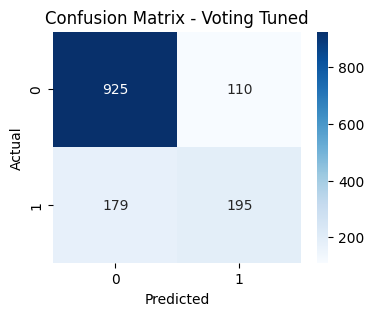

In [23]:
param_grid_voting = {
    'model__voting': ['soft', 'hard']
}

grid_voting = GridSearchCV(
    voting_pipe,
    param_grid_voting,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_voting.fit(X_train, y_train)

print("Best params Voting:", grid_voting.best_params_)
print("Best CV score Voting:", grid_voting.best_score_)

best_voting = grid_voting.best_estimator_
eval_model("Voting Tuned", best_voting, X_train, y_train, X_test, y_test)


In [24]:
best_model = best_rf


In [25]:
import joblib

joblib.dump(best_model, "model_best.pkl")

from google.colab import files
files.download("model_best.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
import sklearn
sklearn.__version__

'1.6.1'